Author: Rishab Sudhir / Maha Alali

# Property Assesment Analysis - Total Value, Living Area and Bedrooms Yearly Trends

In this notebook I aim to analyze the property assessment datasets over a 20 year period to see broad trends over the past two decades

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

Here im importing the datasets and commenting specific issues I had with them plus each column title is labelled in a comment.

In [44]:
pa_2004 = pd.read_csv('../data/property_assessment_2004.csv')[['PID','LU', 'FY2004_TOTAL', 'GROSS_AREA', 'LIVING _AREA']] 
# FY2004_TOTAL = total value of property, LU = Land Use(want to group by residentials), 
# LOTSIZE = Size of property, LIVING _AREA = Total Living Area

pa_2005 = pd.read_csv('../data/property_assessment_2005.csv')[['PID','LU', 'FY2004_TOTAL', 'GROSS_AREA', 'LIVING _AREA']] 
# FY2004_TOTAL = total value of property(should be 05 but data has it as 04), 
# LU = Land Use(want to group by residentials), LOTSIZE = Size of property, LIVING _AREA = Total Living Area

pa_2006 = pd.read_csv('../data/property_assessment_2006.csv')[['PID','LU', 'FY2006_TOTAL', 'GROSS_AREA']] 
# Skipping Living Area for the timing because LIVING _AREA column missing but might be SFLA

pa_2007 = pd.read_csv('../data/property_assessment_2007.csv')[['PID','LU', 'FY2007_TOTAL', 'GROSS_AREA']] 
# No Living Area column but could do GROSS_AREA - BLDG_AREA

pa_2008 = pd.read_csv('../data/property_assessment_2008.csv')[['PID','LU', 'FY2008_TOTAL', 'GROSS_AREA', 'LIVING_AREA', 'R_BDRMS']] 
# R_BDRMS = bedrooms 

pa_2009 = pd.read_csv('../data/property_assessment_2009.csv')[['PID','LU', 'AV_TOTAL', 'GROSS_AREA', 'LIVING_AREA', 'R_BDRMS']] 
# AV_TOTAL is now the total value of property

pa_2010 = pd.read_csv('../data/property_assessment_2010.csv')[['PID','LU', 'AV_TOTAL', 'GROSS_AREA', 'LIVING_AREA', 'R_BDRMS']] 
pa_2011 = pd.read_csv('../data/property_assessment_2011.csv')[['PID','LU', 'AV_TOTAL', 'GROSS_AREA', 'LIVING_AREA', 'R_BDRMS']] 
pa_2012 = pd.read_csv('../data/property_assessment_2012.csv')[['PID','LU', 'AV_TOTAL', 'GROSS_AREA', 'LIVING_AREA', 'R_BDRMS']] 
pa_2013 = pd.read_csv('../data/property_assessment_2013.csv')[['PID','LU', 'AV_TOTAL', 'GROSS_AREA', 'LIVING_AREA', 'R_BDRMS']] 

#pa_2014 = pd.read_csv('../data/property_assessment_2014.csv')[['PID','LU', 'AV_TOTAL', 'GROSS_AREA', 'LIVING_AREA', 'R_BDRMS']] 
# Data set missing?

pa_2015 = pd.read_csv('../data/property_assessment_2015.csv')[['PID','LU', 'AV_TOTAL', 'GROSS_AREA', 'LIVING_AREA', 'R_BDRMS']] 
pa_2016 = pd.read_csv('../data/property_assessment_2016.csv')[['PID','LU', 'AV_TOTAL', 'GROSS_AREA', 'LIVING_AREA', 'R_BDRMS']] 
pa_2017 = pd.read_csv('../data/property_assessment_2017.csv')[['PID','LU', 'AV_TOTAL', 'GROSS_AREA', 'LIVING_AREA', 'R_BDRMS']] 
pa_2018 = pd.read_csv('../data/property_assessment_2018.csv')[['PID','LU', 'AV_TOTAL', 'GROSS_AREA', 'LIVING_AREA', 'R_BDRMS']] 
pa_2019 = pd.read_csv('../data/property_assessment_2019.csv')[['PID','LU', 'AV_TOTAL', 'GROSS_AREA', 'LIVING_AREA', 'R_BDRMS']] 
pa_2020 = pd.read_csv('../data/property_assessment_2020.csv')[['PID','LU', 'AV_TOTAL', 'GROSS_AREA', 'LIVING_AREA', 'R_BDRMS']] 

pa_2021 = pd.read_csv('../data/property_assessment_2021.csv')[['PID','LU', 'TOTAL_VALUE', 'GROSS_AREA', 'LIVING_AREA', 'BED_RMS']] 
# AV_Total is now TOTAL_VALUE, R_BDRMS is now BED_RMS

pa_2022 = pd.read_csv('../data/property_assessment_2022.csv')[['PID','LU', 'TOTAL_VALUE', 'GROSS_AREA', 'LIVING_AREA', 'BED_RMS']]
pa_2023 = pd.read_csv('../data/property_assessment_2023.csv')[['PID','LU', 'TOTAL_VALUE', 'GROSS_AREA', 'LIVING_AREA', 'BED_RMS']]
pa_2024 = pd.read_csv('../data/property_assessment_2024.csv')[['PID','LU', 'TOTAL_VALUE', 'GROSS_AREA', 'LIVING_AREA', 'BED_RMS']]

/var/folders/m7/r7m7ht2j7jbfb00kv5p9d0q00000gn/T/ipykernel_83209/1391031662.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  pa_2004 = pd.read_csv('../data/property_assessment_2004.csv')[['PID','LU', 'FY2004_TOTAL', 'GROSS_AREA', 'LIVING _AREA']]
/var/folders/m7/r7m7ht2j7jbfb00kv5p9d0q00000gn/T/ipykernel_83209/1391031662.py:5: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  pa_2005 = pd.read_csv('../data/property_assessment_2005.csv')[['PID','LU', 'FY2004_TOTAL', 'GROSS_AREA', 'LIVING _AREA']]
/var/folders/m7/r7m7ht2j7jbfb00kv5p9d0q00000gn/T/ipykernel_83209/1391031662.py:9: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  pa_2006 = pd.read_csv('../data/property_assessment_2006.csv')[['PID','LU', 'FY2006_TOTAL', 'GROSS_AREA']]
/var/folders/m7/r7m7ht2j7jbfb00kv5p9d0q00000gn/T/ipykernel_83209/1391031662.py:12: DtypeWarning

Now i want to filter the datasets so that they only contain rows with residential units based on this key: 

### Land Usage Code Key

| Code | Type |
|------|-----------|
| A    | Residental (7 or more Units) |
| AH   | Agricultural/Horticultural |
| C    | Commercial |
| CC   | Commercial Condominium |
| CD   | Residental Condominium Unit | 
| CL   | Commercial Land | 
| CM   | Condomonium Building (excluding units) |
| CP   | Condomonium Parking | 
| E    | Tax Exempt |
| EA   | Tax Exempt (121A) |
| I    | Industrial |
| R1   | Residental One-Family Home |
| R2   | Residental Two-Family Home |
| R3   | Residental Three-Family Home |
| R4   | Residental Four-Family Home |
| RC   | Mixed Use (Residental and Commercial) |

In regards to how im doing it, currently I am doing it manually, but will find way to do it simpler at a later points.

In [45]:
residential_codes = ['R1', 'R2', 'R3', 'RL', 'R4', 'A', 'RC', 'CD']  # List of residential land use codes
pa_2004 = pa_2004[pa_2004['LU'].isin(residential_codes)]
pa_2005 = pa_2005[pa_2005['LU'].isin(residential_codes)]
pa_2006 = pa_2006[pa_2006['LU'].isin(residential_codes)]
pa_2007 = pa_2007[pa_2007['LU'].isin(residential_codes)]
pa_2008 = pa_2008[pa_2008['LU'].isin(residential_codes)]
pa_2009 = pa_2009[pa_2009['LU'].isin(residential_codes)]
pa_2010 = pa_2010[pa_2010['LU'].isin(residential_codes)]
pa_2011 = pa_2011[pa_2011['LU'].isin(residential_codes)]
pa_2012 = pa_2012[pa_2012['LU'].isin(residential_codes)]
pa_2013 = pa_2013[pa_2013['LU'].isin(residential_codes)]
pa_2015 = pa_2015[pa_2015['LU'].isin(residential_codes)]
pa_2016 = pa_2016[pa_2016['LU'].isin(residential_codes)]
pa_2017 = pa_2017[pa_2017['LU'].isin(residential_codes)]
pa_2018 = pa_2018[pa_2018['LU'].isin(residential_codes)]
pa_2019 = pa_2019[pa_2019['LU'].isin(residential_codes)]
pa_2020 = pa_2020[pa_2020['LU'].isin(residential_codes)]
pa_2021 = pa_2021[pa_2021['LU'].isin(residential_codes)]
pa_2022 = pa_2022[pa_2022['LU'].isin(residential_codes)]
pa_2023 = pa_2023[pa_2023['LU'].isin(residential_codes)]
pa_2024 = pa_2024[pa_2024['LU'].isin(residential_codes)]


Now I need to remove null values from the datasets to avoid null value exceptions when preprocessing the data.

In [46]:
dataFrames = [pa_2004,pa_2005,pa_2006,pa_2007,pa_2008,pa_2009,pa_2010,pa_2011,pa_2012,pa_2013,pa_2015,
              pa_2016,pa_2017,pa_2018,pa_2019,pa_2020,pa_2021,pa_2022,pa_2023,pa_2024]
    
i = 2004
bedrooms_loss = 0
living_area_loss = 0
for dataset in dataFrames:

    print("Dataset:"+str(i))
    null_counts = dataset.isnull().sum()
    print("Number of null values in each column:\n", null_counts)

    # Drop rows with missing values
    dataset.dropna(inplace=True)

    # Check again for null values
    null_counts = dataset.isnull().sum()
    print("\nNumber of null values in each column after cleaning:\n", null_counts)
    if i == 2013:
        i +=2
    else:
        i += 1



Dataset:2004
Number of null values in each column:
 PID               0
LU                0
FY2004_TOTAL      0
GROSS_AREA      299
LIVING _AREA    299
dtype: int64

Number of null values in each column after cleaning:
 PID             0
LU              0
FY2004_TOTAL    0
GROSS_AREA      0
LIVING _AREA    0
dtype: int64
Dataset:2005
Number of null values in each column:
 PID               0
LU                0
FY2004_TOTAL      0
GROSS_AREA      322
LIVING _AREA    322
dtype: int64

Number of null values in each column after cleaning:
 PID             0
LU              0
FY2004_TOTAL    0
GROSS_AREA      0
LIVING _AREA    0
dtype: int64
Dataset:2006
Number of null values in each column:
 PID               0
LU                0
FY2006_TOTAL      0
GROSS_AREA      351
dtype: int64

Number of null values in each column after cleaning:
 PID             0
LU              0
FY2006_TOTAL    0
GROSS_AREA      0
dtype: int64
Dataset:2007
Number of null values in each column:
 PID              

## Line Plot for Yearly Average of Total Residential Value 

First to begin lets plot average total value of residential properties yearly using a line plot to see if there are any general trends.

560.0
nan
560.0


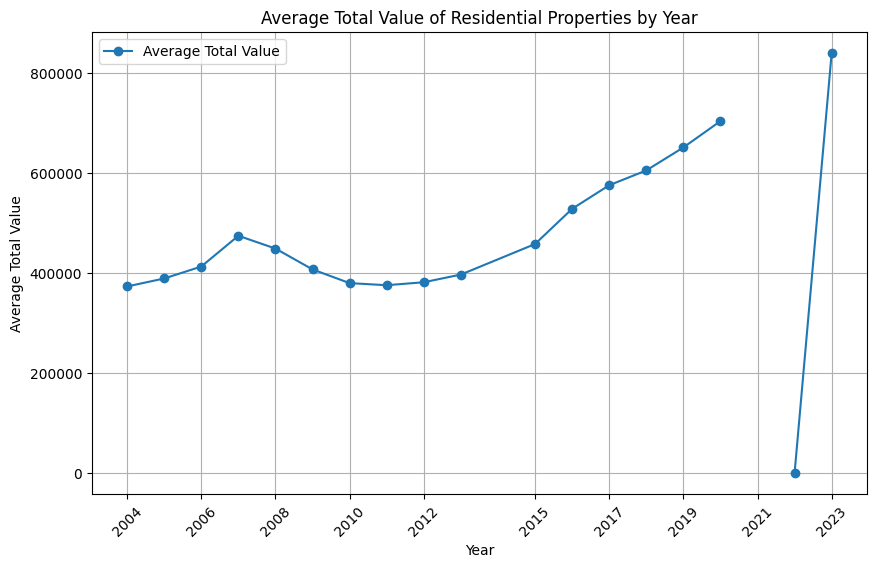

In [47]:
# This is a function to safely compute the mean of a column, ensuring it's numeric
def safe_mean(df, column):
    return pd.to_numeric(df[column], errors='coerce').mean()

# A dictionary mapping years to DataFrames and their respective column names for total values
dataframes_and_columns = {
    2004: (pa_2004, 'FY2004_TOTAL'),
    2005: (pa_2005, 'FY2004_TOTAL'),
    2006: (pa_2006, 'FY2006_TOTAL'),
    2007: (pa_2007, 'FY2007_TOTAL'),
    2008: (pa_2008, 'FY2008_TOTAL'),
    2009: (pa_2009, 'AV_TOTAL'),
    2010: (pa_2010, 'AV_TOTAL'),
    2011: (pa_2011, 'AV_TOTAL'),
    2012: (pa_2012, 'AV_TOTAL'),
    2013: (pa_2013, 'AV_TOTAL'),
    2015: (pa_2015, 'AV_TOTAL'),
    2016: (pa_2016, 'AV_TOTAL'),
    2017: (pa_2017, 'AV_TOTAL'),
    2018: (pa_2018, 'AV_TOTAL'),
    2019: (pa_2019, 'AV_TOTAL'),
    2020: (pa_2020, 'AV_TOTAL'),
    2021: (pa_2021, 'TOTAL_VALUE'),
    2022: (pa_2022, 'TOTAL_VALUE'),
    2023: (pa_2023, 'TOTAL_VALUE'),
    2024: (pa_2024, 'TOTAL_VALUE'),
}


# TODO: Fix this
# stop gap solution for the time being
# years 2021/2022 have weird data

# \\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
# Assuming 'TOTAL_VALUE' is the column with string representations of integers
x = pd.to_numeric(pa_2022['TOTAL_VALUE'].str.replace(',', ' '), errors='coerce')

average_total_value_2022 = x.mean()
print(average_total_value_2022)

# \\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\


# Calculate the safe means
averages_total_value = {year: safe_mean(df, column) for year, (df, column) in dataframes_and_columns.items()}

print(averages_total_value[2021])
print(averages_total_value[2022])


# Create a DataFrame from the averages dictionary
averages_total_value_df = pd.DataFrame(list(averages_total_value.items()), columns=['Year', 'Average Total Value'])

# Plotting
averages_total_value_df.plot(x='Year', y='Average Total Value', kind='line', marker='o', figsize=(10, 6))
plt.title('Average Total Value of Residential Properties by Year')
plt.ylabel('Average Total Value')
plt.xlabel('Year')
plt.grid(True)

# Setting x-ticks to include every other year present in the DataFrame
# Get every other year using slicing with a step of 2
biyearly_ticks = averages_total_value_df['Year'].unique()[::2]

# Use the biyearly ticks for the x-axis
plt.xticks(biyearly_ticks)

# Rotate the x-ticks for better readability
plt.xticks(rotation=45)

plt.show()



Notes:
- 2014 is skipped as there is no data for it
- weird data on 2021, 2022, 2023 and possibly 2024 - need more analysis.

Analysis:

There seems to be an upward trend of average residential properties values year by year almost a 20,000 increase in property values from 2004 to 2019. I want to check how relevant this is to the yearly inflation, and then also check whether these property prices have a correlation to the renovations happening in units.

Now I want to check the trends In average bedrooms and living area.


## Line Plot for Yearly Average of Number of Bedrooms

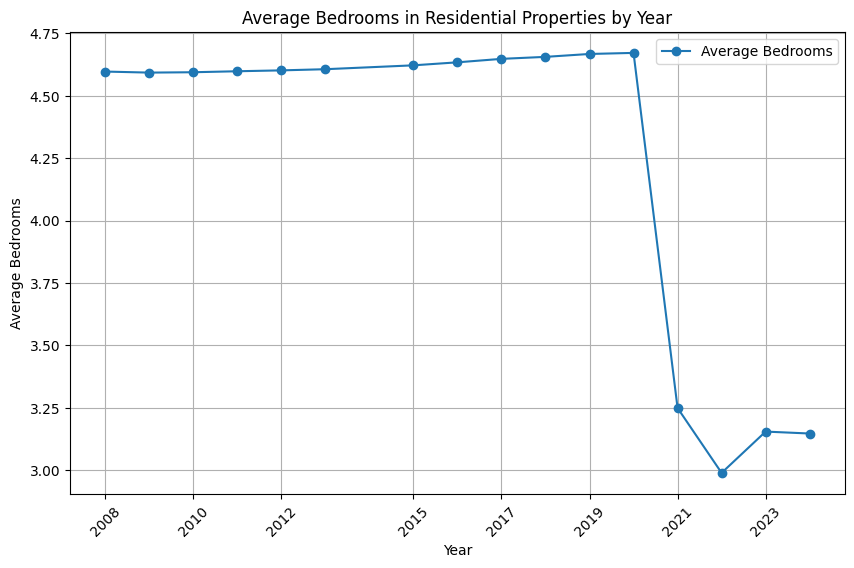

In [48]:
dataframes_and_columns_2 = {
    2008: (pa_2008, 'R_BDRMS'),
    2009: (pa_2009, 'R_BDRMS'),
    2010: (pa_2010, 'R_BDRMS'),
    2011: (pa_2011, 'R_BDRMS'),
    2012: (pa_2012, 'R_BDRMS'),
    2013: (pa_2013, 'R_BDRMS'),
    2015: (pa_2015, 'R_BDRMS'),
    2016: (pa_2016, 'R_BDRMS'),
    2017: (pa_2017, 'R_BDRMS'),
    2018: (pa_2018, 'R_BDRMS'),
    2019: (pa_2019, 'R_BDRMS'),
    2020: (pa_2020, 'R_BDRMS'),
    2021: (pa_2021, 'BED_RMS'),
    2022: (pa_2022, 'BED_RMS'),
    2023: (pa_2023, 'BED_RMS'),
    2024: (pa_2024, 'BED_RMS'),
}

# Calculate the safe means
average_bedrooms = {year: safe_mean(df, column) for year, (df, column) in dataframes_and_columns_2.items()}


# Create a DataFrame from the averages dictionary
average_bedrooms_df = pd.DataFrame(list(average_bedrooms.items()), columns=['Year', 'Average Bedrooms'])

# Plotting
average_bedrooms_df.plot(x='Year', y='Average Bedrooms', kind='line', marker='o', figsize=(10, 6))
plt.title('Average Bedrooms in Residential Properties by Year')
plt.ylabel('Average Bedrooms')
plt.xlabel('Year')
plt.grid(True)

# Setting x-ticks to include every other year present in the DataFrame
# Get every other year using slicing with a step of 2
biyearly_ticks = average_bedrooms_df['Year'].unique()[::2]

# Use the biyearly ticks for the x-axis
plt.xticks(biyearly_ticks)

# Rotate the x-ticks for better readability
plt.xticks(rotation=45)

plt.show()


Notes:
- No Data on bedrooms from 2004 to 2007
- 2014 is skipped as there is no data for it
- weird data on 2021, 2022, 2023 and possibly 2024 - need more analysis.

Analysis:

The number of bedrooms seem to be consistent from 2008 to 2019, however make a steep decline post 2019. Not sure why this is but data shows that there was a sharp decline in living area too, but we have to keep in mind that the data is a bit weird. Furthermore if we ignore data from post 2020, making a simple connection It may mean that people are on average paying more for the same space but need to do more analysis on again inflation, types of units these rooms correlate to and whether there's been renovations in these units leading to the increased cost.

Then I decided to check the trends In average living area and see if we can correlate it to bedrooms by any chance.


## Line Plot for Yearly Average of Living Area

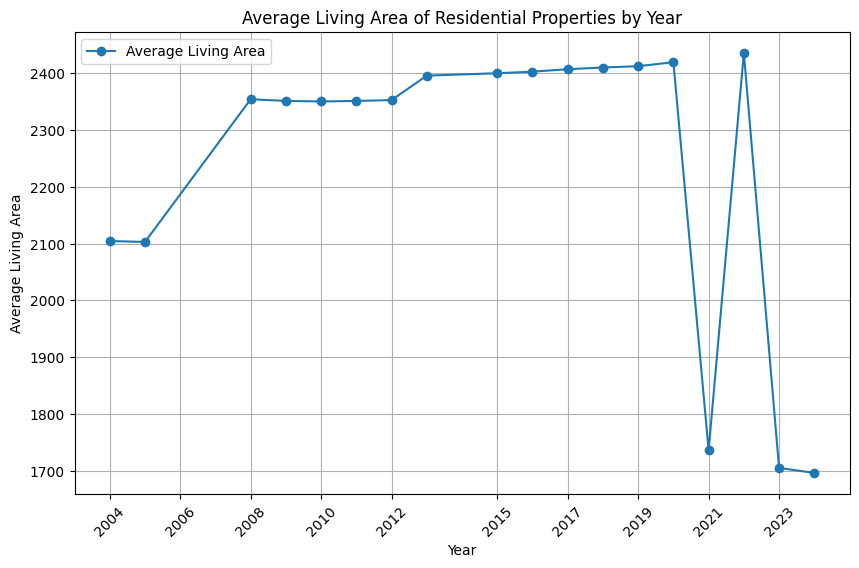

In [49]:
# A dictionary mapping years to DataFrames and their respective column names for total values
dataframes_and_columns_3 = {
    2004: (pa_2004, 'LIVING _AREA'),
    2005: (pa_2005, 'LIVING _AREA'),
    2008: (pa_2008, 'LIVING_AREA'),
    2009: (pa_2009, 'LIVING_AREA'),
    2010: (pa_2010, 'LIVING_AREA'),
    2011: (pa_2011, 'LIVING_AREA'),
    2012: (pa_2012, 'LIVING_AREA'),
    2013: (pa_2013, 'LIVING_AREA'),
    2015: (pa_2015, 'LIVING_AREA'),
    2016: (pa_2016, 'LIVING_AREA'),
    2017: (pa_2017, 'LIVING_AREA'),
    2018: (pa_2018, 'LIVING_AREA'),
    2019: (pa_2019, 'LIVING_AREA'),
    2020: (pa_2020, 'LIVING_AREA'),
    2021: (pa_2021, 'LIVING_AREA'),
    2022: (pa_2022, 'LIVING_AREA'),
    2023: (pa_2023, 'LIVING_AREA'),
    2024: (pa_2024, 'LIVING_AREA'),
}


# Calculate the safe means
averages_living_area = {year: safe_mean(df, column) for year, (df, column) in dataframes_and_columns_3.items()}


# Create a DataFrame from the averages dictionary
averages_living_area_df = pd.DataFrame(list(averages_living_area.items()), columns=['Year', 'Average Living Area'])

# Plotting
averages_living_area_df.plot(x='Year', y='Average Living Area', kind='line', marker='o', figsize=(10, 6))
plt.title('Average Living Area of Residential Properties by Year')
plt.ylabel('Average Living Area')
plt.xlabel('Year')
plt.grid(True)

# Setting x-ticks to include every other year present in the DataFrame
# Get every other year using slicing with a step of 2
biyearly_ticks = averages_total_value_df['Year'].unique()[::2]

# Use the biyearly ticks for the x-axis
plt.xticks(biyearly_ticks)

# Rotate the x-ticks for better readability
plt.xticks(rotation=45)

plt.show()



Notes:
- No Data on living area from 2006 to 2007
- 2014 is skipped as there is no data for it
- weird data on 2021, 2022, 2023 and possibly 2024 - need more analysis.

Analysis:

It seems the average living area from 2004 to 2019 has seen an upward trend. With a relatively large increase from 2005 to 2008. But marginally small increases from then on. Again post 2020 shows a sharp decline but once again data is weirdly formatted so that may be the case. I want to do further analysis to see whether this increase in living area is proportional to the increase in property value and whether this is due to renovations or not. Further I want to see if this increase in living area has lead to an increase in the number of bedrooms.

Now I want to check if I can create any connections between the graphs.


## Combining Line Plots - Average Total Property Value + Average Living Area

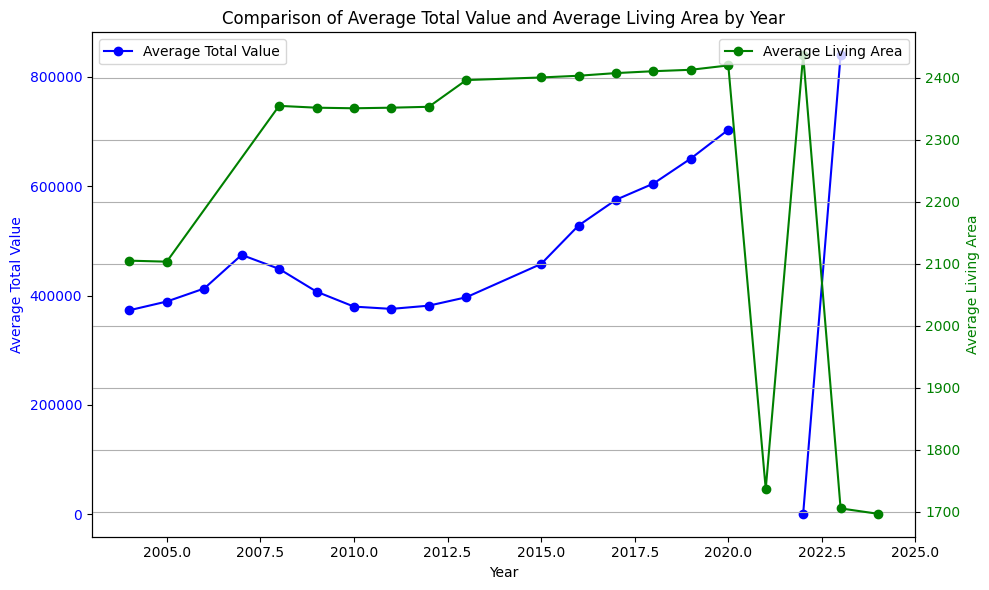

In [50]:
# Create the plot with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the total value on the first y-axis
ax1.plot(averages_total_value_df['Year'], averages_total_value_df['Average Total Value'], color='blue', marker='o', label='Average Total Value')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Total Value', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for the living area
ax2 = ax1.twinx()
ax2.plot(averages_living_area_df['Year'], averages_living_area_df['Average Living Area'], color='green', marker='o', label='Average Living Area')
ax2.set_ylabel('Average Living Area', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Title and grid
plt.title('Comparison of Average Total Value and Average Living Area by Year')
fig.tight_layout()  # To ensure the right y-label is not slightly clipped
plt.grid(True)

# Show plot with legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

Can see that the living area has moved up in line with the property value but not sure how representative this is of actual trends, need further analysis.

## Combining Line Plots - Average Living Area + Average Number of Bedrooms

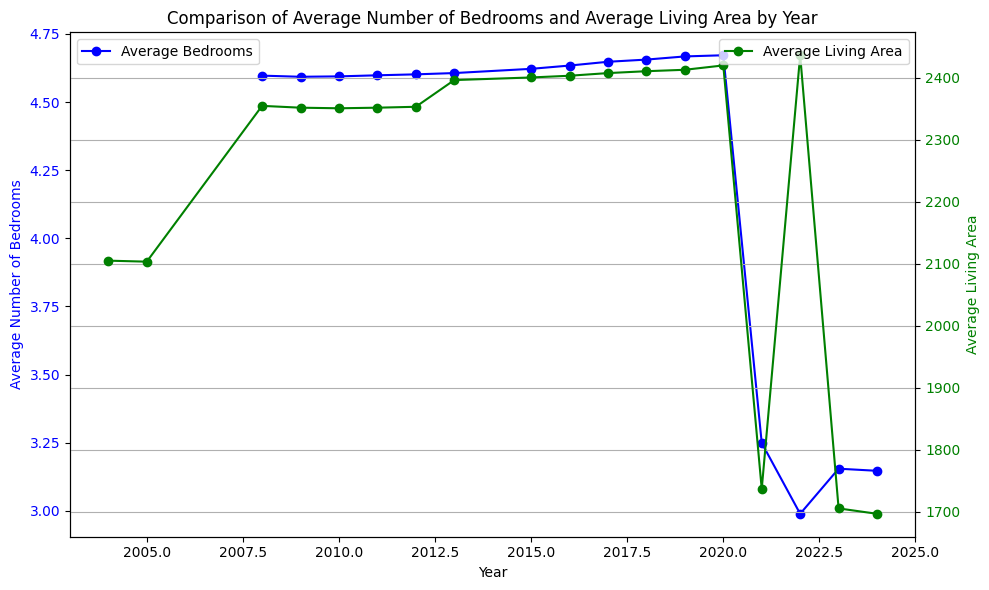

In [51]:
# Create the plot with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))


# Plot the total value on the first y-axis
ax1.plot(average_bedrooms_df['Year'], average_bedrooms_df['Average Bedrooms'], color='blue', marker='o', label='Average Bedrooms')
ax1.set_ylabel('Average Number of Bedrooms', color='blue')
ax1.set_xlabel('Year')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for the living area
ax2 = ax1.twinx()
ax2.plot(averages_living_area_df['Year'], averages_living_area_df['Average Living Area'], color='green', marker='o', label='Average Living Area')
ax2.set_ylabel('Average Living Area', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Title and grid
plt.title('Comparison of Average Number of Bedrooms and Average Living Area by Year')
fig.tight_layout()  # To ensure the right y-label is not slightly clipped
plt.grid(True)

# Show plot with legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

Analysis:

It seems that both living area and the average number of bedrooms took a sharp decline around 2021 but there is also problems with the dataset so need to confirm on that before moving further with analysis here.

### Questions that need answering

- For 2005 of the property assessment in the data key it says FY2005 Total Value is the total value, in the data however i have 2 columns FY2004_TOTAL and FY200_ LAND ?? Can i assume FY2004_TOTAL is the total value?

- Can i assume gross area in 2004 and 2005 are the area of building and lot? no clear description in the data key?

- 2006 missing living area, what is SFLA? is that living area?

- 2007 missing living area, could i do GROSS_AREA - BLDG_AREA?

- 2009 no data key can i assume AV_TOTAL is the total value of the land+bld?

- 2014 dataset missing?